This notebook is based on code written by: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Download the dataset

In [12]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Each image is 62*47 so there are 2914 features in this dataset.

In [40]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(10)
pca.fit(faces.data)

PCA(n_components=10)

In [41]:
print("The number of components to keep by Kaiser's rule is:", 
      len(pca.explained_variance_[pca.explained_variance_ >=1]))

The number of components to keep by Kaiser's rule is: 10


Scree Plot

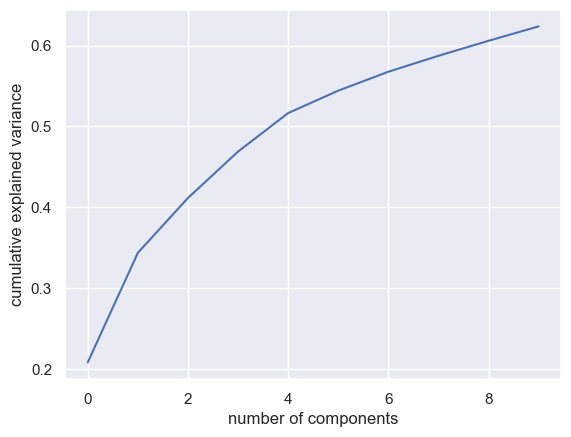

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Plotting the principal components. Each one appears to loook like a face.

IndexError: index 10 is out of bounds for axis 0 with size 10

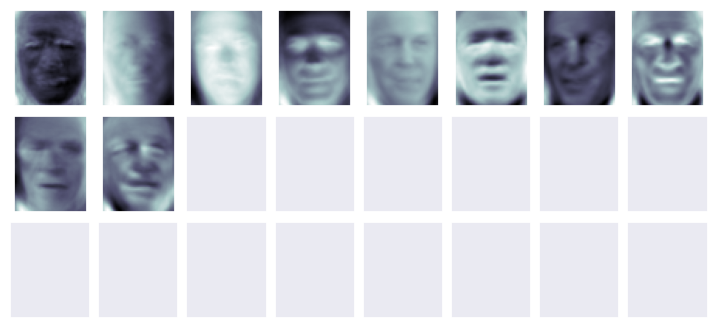

In [43]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

In [71]:
# Compute the components and projected faces
n = [10, 150]
pca = []
components = []
projected = []
for i in range(len(n)):
    pca.append(RandomizedPCA(n[i]).fit(faces.data))
    components.append(pca[i].transform(faces.data))
    projected.append(pca[i].inverse_transform(components[i]))

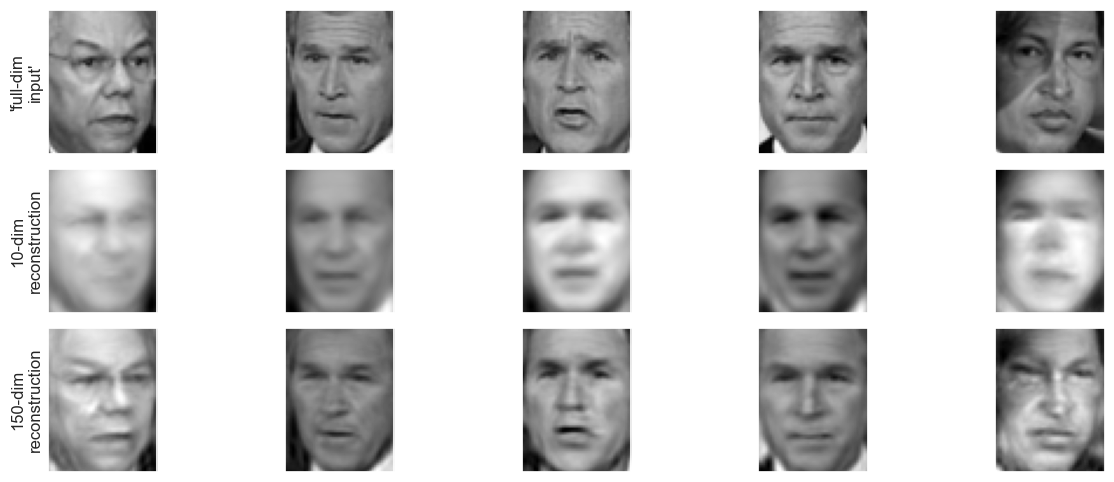

In [72]:
# Plot the results
n_faces = 5
fig, ax = plt.subplots(len(n)+1, n_faces, figsize=(n_faces*3, len(n)*3),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for j in range(1+len(n)):
    for i in range(n_faces):
        if j == 0:
            ax[j, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
            ax[j, 0].set_ylabel("'full-dim\ninput'")
        else:
            ax[j, i].imshow(projected[j-1][i].reshape(62, 47), cmap='binary_r')
            ax[j, 0].set_ylabel(f"{n[j-1]}-dim\nreconstruction")

plt.savefig("test.pdf")
# ax[0, 0].set_ylabel('full-dim\ninput')
# ax[1, 0].set_ylabel('10-dim\nreconstruction')
# ax[2, 0].set_ylabel('10-dim\nreconstruction')